# Explore Kaggle Goodreads-books dataset
1. Read the dataset into a dataframe and print its shape
2. Check for invalid values in the dataset
3. Know the data types of variables
4. Describe the data
5. Make Histograms and Box-Plots and look for outliers

In [1]:
#All imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing

In [4]:
#Load the csv file as Pandas dataframe and check its shape
#Note the warning below: The data contains few erroneous rows that have extra values in its 11th column;
#read_csv function skips these erroneous cases from our dataframe df.
#The original csv file 
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


### a. Peek into first 5 rows and the column names of the dataframe

In [5]:
#Let's look at the first 5 rows of the data
#We do see the 10 column names and clearly J.K. Rowling's Harry Potter books...yaay :-)!
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [6]:
# print column names 
print("Column names: {0}".format(list(df.columns)))

Column names: ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '# num_pages', 'ratings_count', 'text_reviews_count']


## b. There are no invalid entries in the data. It is already clean.

In [7]:
#Check if the data has any null values
df.isnull().values.any()

False

## c. Explore the variabels to understand the data better.

In [8]:
#Get column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [9]:
""" 
 From the column information above, we see that the following variables are numerical in nature, 
 i.e. these have either int64 or float64 types.
                     ________________________________________________
                                 |                 |
                      Variable # | Variable Name   | Variable Type
                     ________________________________________________
                         1         bookID              int64
                         4         average_rating      float64
                         6         isbn13              int64
                         7         # num_pages         int64
                         8         ratings_count       int64
                         9         text_reviews_count  int64

 Next we will peek into the counts, mean, std, range and percentiles of all the continuous varibles in data.
"""

continuousVars = ['bookID', 'average_rating', 'isbn13','# num_pages','ratings_count', 'text_reviews_count']
df[continuousVars].describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


## d. Exploring the continuous variables in data

### 1. Build histograms to take a peak at the counts.

c:\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


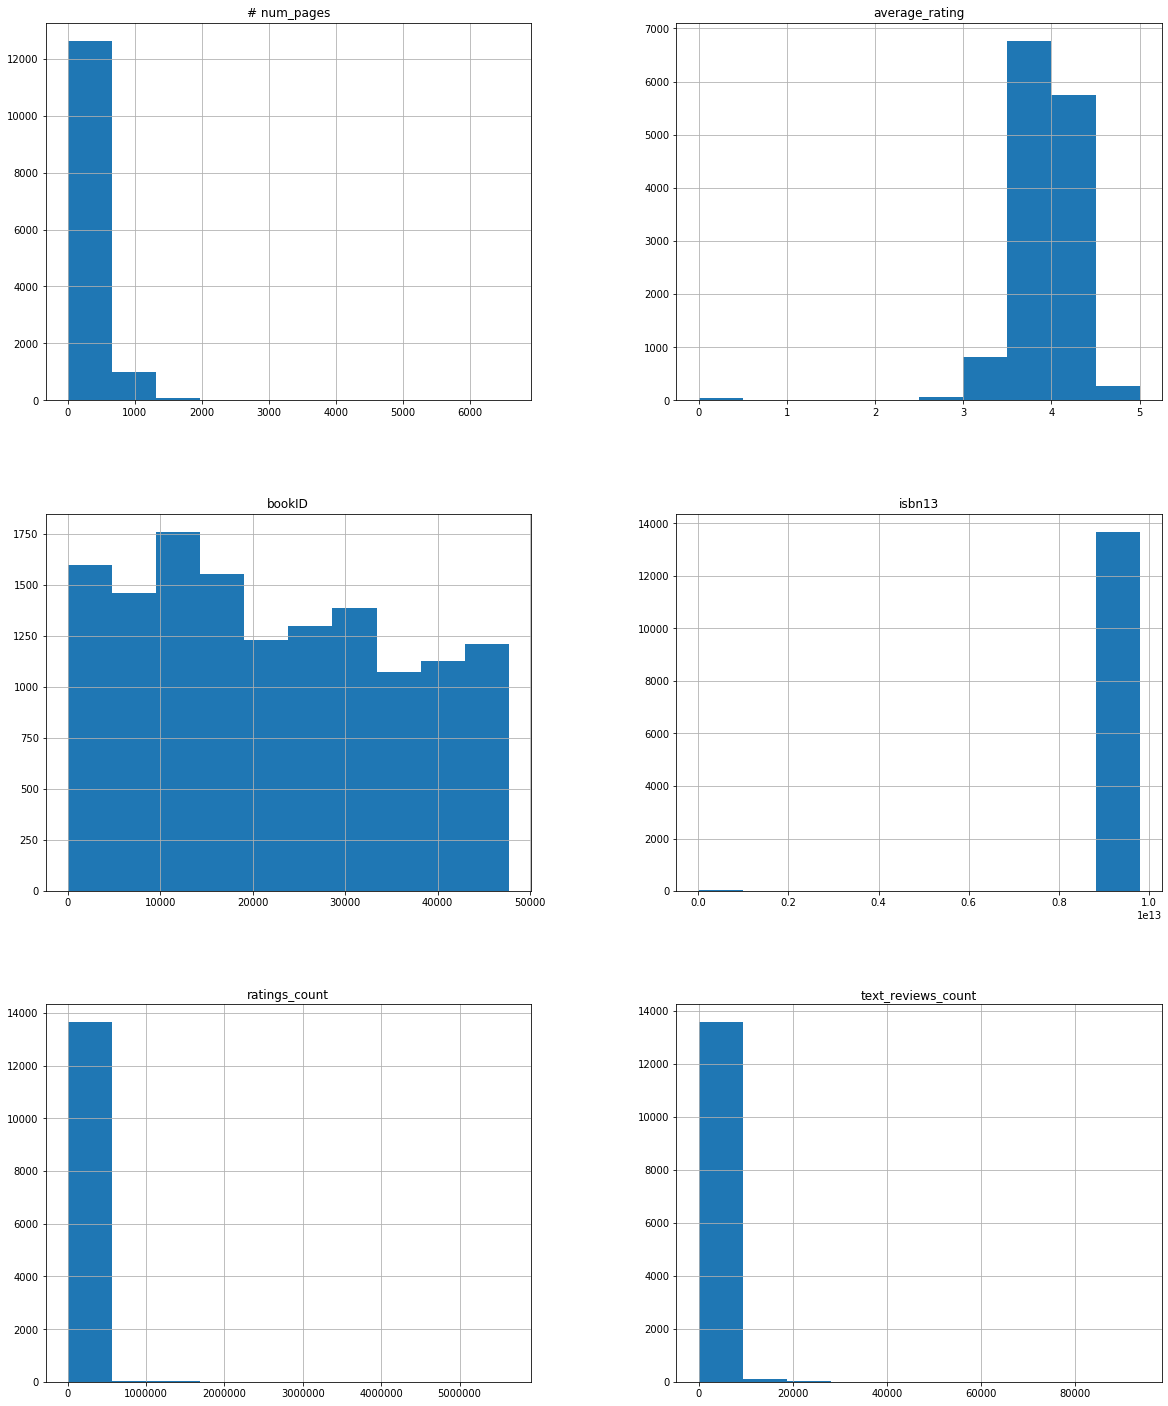

In [10]:
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df[continuousVars].hist(ax = ax)
plt.show()

### 2. Drawing a Normal curve on the histograms could help understand the distribution type

In [11]:
#Think it would be nice to draw a normal curve on the histograms to check out the skewness of the data distribution.
# The function below fits a normal distribution to the data
# It is named PlotHistogramsWithNormalCurve and the following are the parameters,
#  dfCol   - The univariate column for which to plot the histogram (pandas vector)
#  varName - Column name to print on titles (string)
#  bins    - Preferred bins in the histogram (default = 20)
#  color   - Preferred color of histogram (default is blue)
def PlotHistogramsWithNormalCurve(dfCol, varName, bins=20, color='b'):
    dMean, dStd = norm.fit(dfCol)
    plt.figure(figsize = (8, 8))
    # Plot hist
    plt.hist(dfCol, bins, density=True, alpha=0.6, color=color)
    # Plot PDF.
    xmin, xmax = plt.xlim()
    xlin = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(xlin, dMean, dStd)
    plt.plot(xlin, pdf, 'k', linewidth=2)
    title = "Fit results for [" + varName + "]: Mean = %.4f,  Std. Dev, = %.4f" % (dMean, dStd)
    plt.title(title)
    plt.show()

#### '# num_pages' has a left skewed distribution

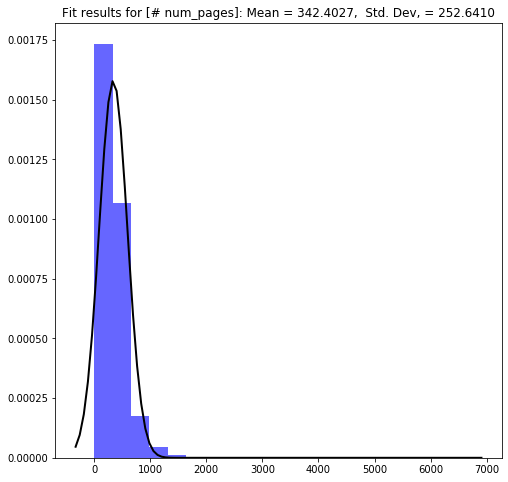

In [12]:
PlotHistogramsWithNormalCurve(df['# num_pages'], "# num_pages")

 #### 'average_rating' is Normally distributed

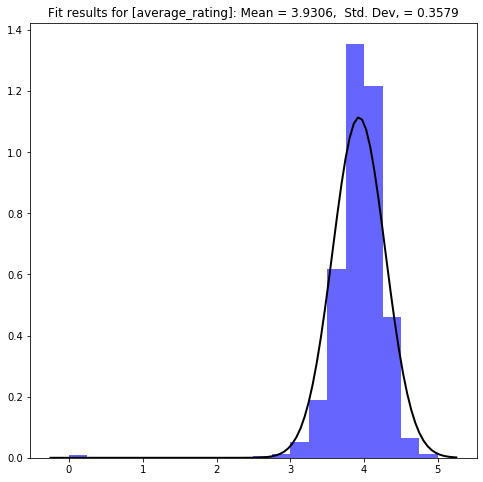

In [13]:
PlotHistogramsWithNormalCurve(df['average_rating'], "average_rating")

#### 'bookID' is Uniformly distributed??

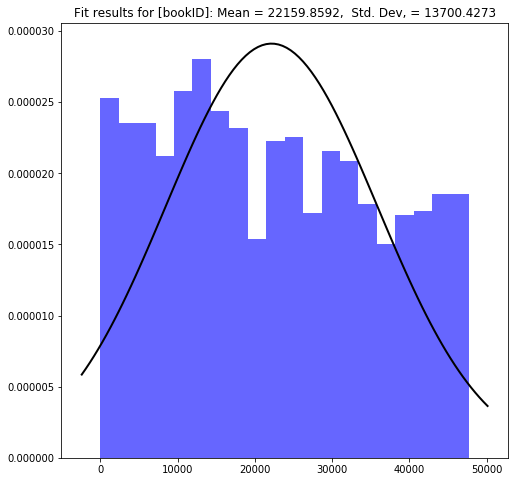

In [14]:
PlotHistogramsWithNormalCurve(df['bookID'], "bookID")

#### 'isbn13' shows not much of a distribution, mostly falls into one bin

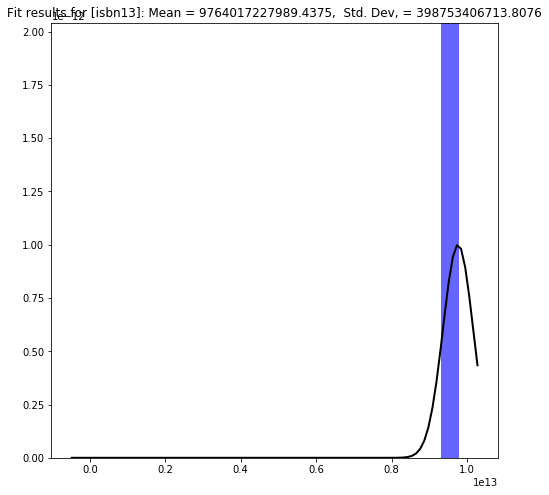

In [15]:
PlotHistogramsWithNormalCurve(df['isbn13'], "isbn13")

#### 'ratings_count' is possibly left skewed but could there be extreme values in the distribution causing it to be skewed?

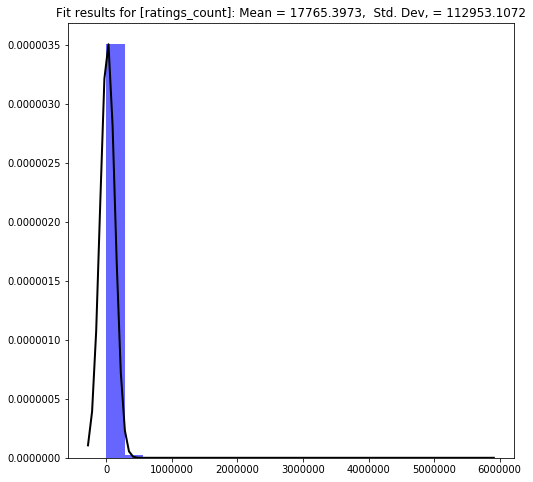

In [16]:
PlotHistogramsWithNormalCurve(df['ratings_count'], "ratings_count")

#### 'text_reviews_count' is possibly left skewed but could there be extreme values in the distribution causing it to be skewed?

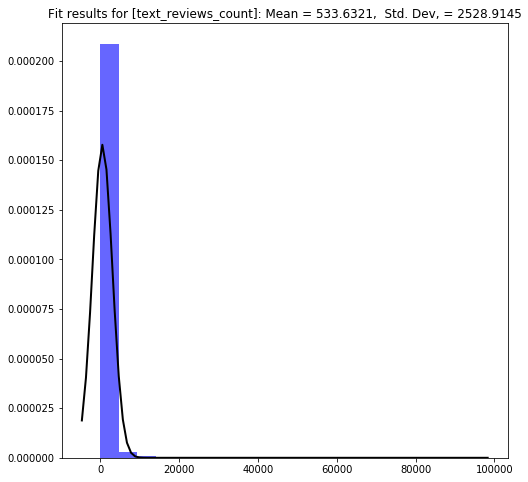

In [17]:
#Possibly left skewed but looks like there are some extreme values in the distribution
PlotHistogramsWithNormalCurve(df['text_reviews_count'], "text_reviews_count") 

### 3. Box-plots could help detect variables with outliers

#### Looks like there are couple of outlier values that are 4 and 5 millon rating_counts that stretch the y-axis scale of the box plots

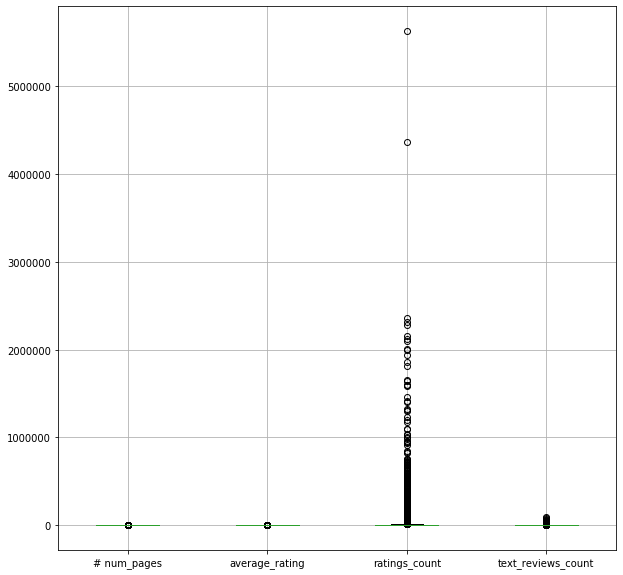

In [18]:
plt.figure(figsize = (10, 10))
df.boxplot(column= ['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

### Clearly we need to normalize this data to see all variables on the same scale

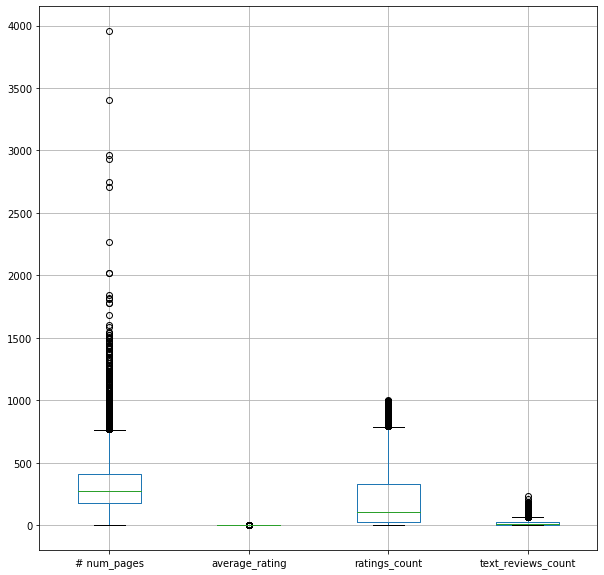

In [19]:
df2 = df[(df['ratings_count'] < 1000)]
plt.figure(figsize = (10, 10))
df2.boxplot(column= ['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

### The normalized box-plot clearly fits our variables on the same scale and also shows many values outside of the Inter Quartile Range (IQR), min and max values

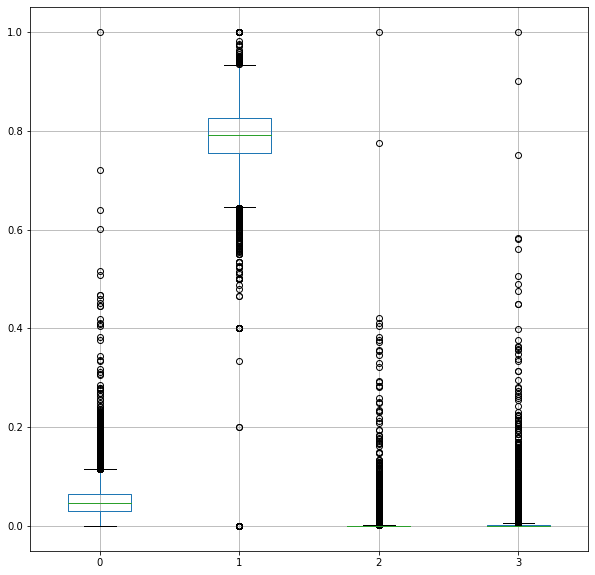

In [20]:
# Create varsToNormalize, where all the varsToNormalize values are treated as floats
varsToNormalize = df[['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count']].values.astype(float)

# Create a minimum and maximum preprocessing object
range_Scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
vars_Scaled = range_Scaler.fit_transform(varsToNormalize)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(vars_Scaled)

plt.figure(figsize = (10, 10))
df_normalized.boxplot()
plt.show()

## e. Lets check out the categorical variables in data

In [21]:
categoricalVars = ['title', 'authors', 'isbn', 'language_code']
df[categoricalVars].describe()

,title,authors,isbn,language_code
count,13714,13714,13714,13714
unique,12422,7600,13714,30
top,'Salem's Lot,Agatha Christie,015600125X,eng
freq,11,69,1,10594


#### Clearly we can infer details about unique values in these variables. 
#### Also some other info from the above table,
#### 1. Looks like the top recurring book title is "One Hundred Years of Solitude" (count of 11) 
#### 2. Agatha Christie is the author with the most books (count of 69)
#### 3. Most of the books are in English (10594/13714)